## 5.1 Risk-Adjusted Return Ratios

For the following concepts, we are going to use the data from Yahoo Finance as done in the previous lesson.

C:\Users\takah\AppData\Local\Temp\ipykernel_16436\4050831758.py:26: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


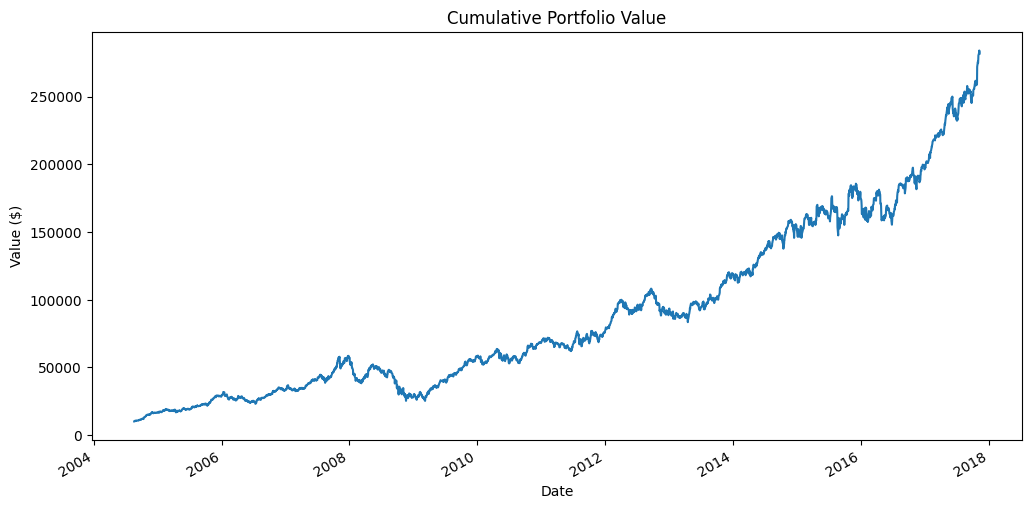

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the assets and their respective portfolio weights
assets = ['AAPL', 'MSFT', 'GOOGL']
portfolio = [0.45, 0.35, 0.20]

# Define the time period for historical data and the initial investment amount
investment = 10000

# Function to read data from the files
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Close'], parse_dates=['Date'], index_col='Date')

# Read data from the files
data_aapl = read_data('./data/aapl.us.txt')
data_msft = read_data('./data/msft.us.txt')
data_googl = read_data('./data/googl.us.txt')

# Combine data into a single DataFrame
data = pd.concat([data_aapl['Close'], data_msft['Close'], data_googl['Close']], axis=1)
data.columns = assets

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate portfolio returns
portfolio_returns = (returns * portfolio).sum(axis=1)

# Calculate cumulative portfolio value
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_value = cumulative_returns * investment

# Plot the cumulative portfolio value
plt.figure(figsize=(12, 6))
cumulative_value.plot()
plt.title('Cumulative Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.show()


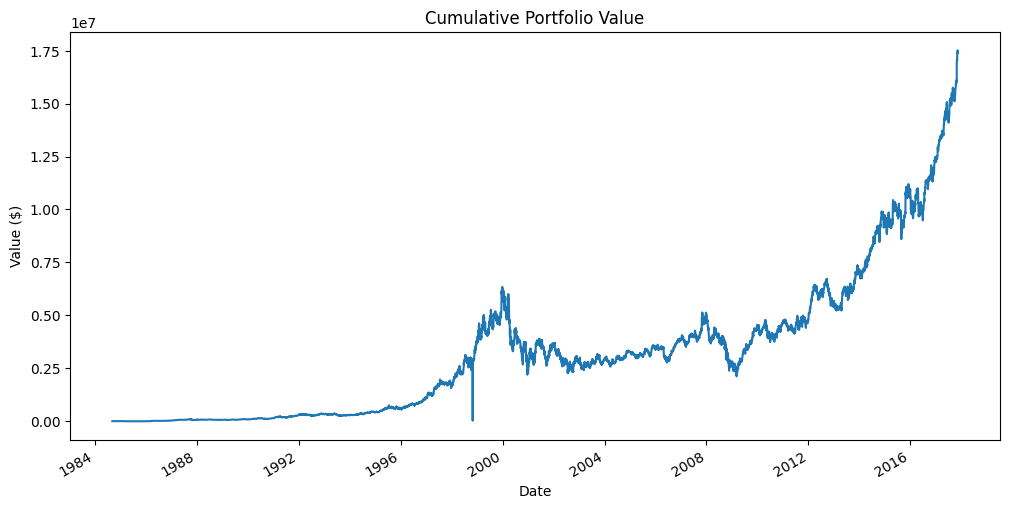

In [26]:
# Initialize an empty list to store dataframes for each asset
dfs = []
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the assets and their respective portfolio weights
assets = ['AAPL', 'MSFT', 'GOOGL']
portfolio = [0.45, 0.35, 0.20]

# Define the time period for historical data and the initial investment amount
investment = 10000

# Function to read data from the files
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Close'], parse_dates=['Date'], index_col='Date')

# Dictionary to map asset names to their respective data files
file_mapping = {
    'AAPL': './data/aapl.us.txt',
    'MSFT': './data/msft.us.txt',
    'GOOGL': './data/googl.us.txt'
}

# List to store the dataframes
dfs = []

# Loop through each asset and its corresponding portfolio weight
for asset, p in zip(assets, portfolio):
    # Read historical data for the asset from the respective file
    data = read_data(file_mapping[asset])
    
    # Create a dataframe with the closing prices
    data = pd.DataFrame(data['Close'])
    
    # Calculate normalized returns (returns relative to the first closing price)
    data['Norm return'] = data['Close'] / data.iloc[0]['Close']
    
    # Calculate the allocation (normalized returns multiplied by the portfolio weight)
    data['Allocation'] = data['Norm return'] * p
    
    # Calculate the position value (allocation multiplied by the initial investment)
    data['Position'] = data['Allocation'] * investment
    
    # Append the dataframe to the list
    dfs.append(data)

# Concatenate all dataframes
combined_df = pd.concat(dfs, axis=1)

# Summing the 'Position' columns to get the total portfolio position
portfolio_value = combined_df[[col for col in combined_df.columns if 'Position' in col]].sum(axis=1)

# Plot the cumulative portfolio value
plt.figure(figsize=(12, 6))
portfolio_value.plot()
plt.title('Cumulative Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.show()


In [6]:
# Show the first 5 records of Tesla
dfs[0].head(5)

,Close,Norm return,Allocation,Position
Date,,,,
1984-09-07,0.42388,1.000000,0.450000,4500.000000
1984-09-10,0.42134,0.994008,0.447303,4473.034821
1984-09-11,0.42902,1.012126,0.455457,4554.567330
1984-09-12,0.41618,0.981834,0.441826,4418.255167
1984-09-13,0.43927,1.036307,0.466338,4663.383505


In [7]:
# Extract the 'Position' column from each dataframe in dfs and create a list
all_pos = [dfs[0]['Position'], dfs[1]['Position'], dfs[2]['Position']]
all_pos

[Date
 1984-09-07    4.500000e+03
 1984-09-10    4.473035e+03
 1984-09-11    4.554567e+03
 1984-09-12    4.418255e+03
 1984-09-13    4.663384e+03
                   ...     
 2017-11-06    1.843293e+06
 2017-11-07    1.849132e+06
 2017-11-08    1.864313e+06
 2017-11-09    1.860491e+06
 2017-11-10    1.854334e+06
 Name: Position, Length: 8364, dtype: float64,
 Date
 1986-03-13    3.500000e+03
 1986-03-14    3.500000e+03
 1986-03-17    3.500000e+03
 1986-03-18    3.500000e+03
 1986-03-19    3.500000e+03
                   ...     
 2017-11-06    3.924665e+06
 2017-11-07    3.914908e+06
 2017-11-08    3.928846e+06
 2017-11-09    3.907009e+06
 2017-11-10    3.896787e+06
 Name: Position, Length: 7983, dtype: float64,
 Date
 2004-08-19     2000.000000
 2004-08-20     2158.859876
 2004-08-23     2180.586008
 2004-08-24     2090.293004
 2004-08-25     2112.816424
                   ...     
 2017-11-06    41565.876022
 2017-11-07    41952.959936
 2017-11-08    42188.160255
 2017-11-09    41766

In [8]:
# Concatenate the position values
# axis=0 Concatenate along the rows, axis=1 Concatenate along the columns (3 columns)

portf_val = pd.concat(all_pos, axis=1)
portf_val

,Position,Position,Position
Date,,,
1984-09-07,4.500000e+03,NaN,NaN
1984-09-10,4.473035e+03,NaN,NaN
1984-09-11,4.554567e+03,NaN,NaN
1984-09-12,4.418255e+03,NaN,NaN
1984-09-13,4.663384e+03,NaN,NaN
...,...,...,...
2017-11-06,1.843293e+06,3.924665e+06,41565.876022
2017-11-07,1.849132e+06,3.914908e+06,41952.959936
2017-11-08,1.864313e+06,3.928846e+06,42188.160255


In [9]:
# Set the column names of the dataframe to the asset names
portf_val.columns = assets
portf_val

,AAPL,MSFT,GOOGL
Date,,,
1984-09-07,4.500000e+03,NaN,NaN
1984-09-10,4.473035e+03,NaN,NaN
1984-09-11,4.554567e+03,NaN,NaN
1984-09-12,4.418255e+03,NaN,NaN
1984-09-13,4.663384e+03,NaN,NaN
...,...,...,...
2017-11-06,1.843293e+06,3.924665e+06,41565.876022
2017-11-07,1.849132e+06,3.914908e+06,41952.959936
2017-11-08,1.864313e+06,3.928846e+06,42188.160255


In [10]:
# Add a new column 'Total' which is the sum of all position values across assets
portf_val['Total'] = portf_val.sum(axis=1)
portf_val

,AAPL,MSFT,GOOGL,Total
Date,,,,
1984-09-07,4.500000e+03,NaN,NaN,4.500000e+03
1984-09-10,4.473035e+03,NaN,NaN,4.473035e+03
1984-09-11,4.554567e+03,NaN,NaN,4.554567e+03
1984-09-12,4.418255e+03,NaN,NaN,4.418255e+03
1984-09-13,4.663384e+03,NaN,NaN,4.663384e+03
...,...,...,...,...
2017-11-06,1.843293e+06,3.924665e+06,41565.876022,5.809524e+06
2017-11-07,1.849132e+06,3.914908e+06,41952.959936,5.805993e+06
2017-11-08,1.864313e+06,3.928846e+06,42188.160255,5.835348e+06


<Axes: xlabel='Date'>

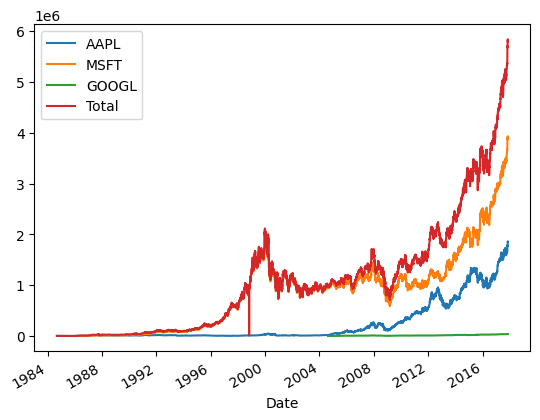

In [11]:
# Plot the total portfolio value over time
portf_val.plot()

We want to divide the most recent portfolio value by the initial portfolio value to get the growth factor of the portfolio

In [12]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (portf_val['Total'][-1] / portf_val['Total'][0] - 1)
cumulative_return

C:\Users\takah\AppData\Local\Temp\ipykernel_16436\2435142940.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = 100 * (portf_val['Total'][-1] / portf_val['Total'][0] - 1)


np.float64(128627.68264356775)

In [13]:
# Print the cumulative return
print(f'\nThe cumulative return is: {cumulative_return:.2f}%\n\n')


The cumulative return is: 128627.68%




In [14]:
# Create a copy of the portfolio value dataframe
portf_val_growth = portf_val.copy()


In [15]:
# Calculate the daily percentage change for each column in the dataframe
for column in portf_val_growth.columns:
    portf_val_growth[column] = portf_val_growth[column].pct_change(1)

C:\Users\takah\AppData\Local\Temp\ipykernel_16436\3532068528.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  portf_val_growth[column] = portf_val_growth[column].pct_change(1)


This method calculates the percentage change between the current element and the element one position before (i.e., the previous row).
The 1 argument specifies the number of periods to shift for calculating the percentage change. In this case, it shifts by one period (row). This assigns the calculated percentage changes back to the same column in the dataframe.

<Axes: xlabel='Date'>

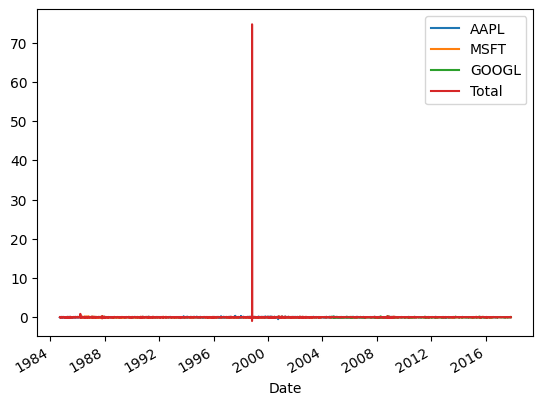

In [16]:
# Plot the total portfolio value growth over time
portf_val_growth.plot()

Risk-adjusted return on capital (RAROC) is a risk-based profitability measurement framework for analyzing risk-adjusted financial performance and providing a consistent view of profitability across businesses.

From [Wikipedia](https://en.wikipedia.org/wiki/Risk-adjusted_return_on_capital)

A Risk Adjusted Return is none other than a calculation of the profit or potential profit given an investment. That calculation takes into consideration the accepted risk for each return.

There are different ways to calculate such risk-adjusted returns, let's explore some of them.


#### Sharpe Ratio

The formula of the Sharpe Ratio is the following:

$$
Sharpe\ Ratio = \frac{R_p - R_f}{\sigma_p}
$$

Where:

* $R_p$ is the expected portfolio return
* $R_f$ is the risk-free rate
* $\sigma_p$ is the standard deviation of the portfolio's excess return

The Sharpe ratio calculates how well an investor is compensated for the risk they've taken in an investment. When comparing two different investments against the same benchmark, the asset with the higher Sharpe ratio provides a higher return for the same amount of risk or the same return for a lower risk than the other asset.

In [17]:
# Define the number of trading days in a year
N = 255

In [18]:
# Define the risk-free rate
rf = 0.042  # 4.2%

The risk-free rate is the return expected from an investment that is considered free of risk.

In [19]:
# Define the Sharpe ratio calculation function
def sharpe_ratio(return_series, N, rf):
    mean = (return_series.mean() * N) - rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

In [20]:
# Apply the Sharpe ratio function to each column in the portf_val_growth dataframe
sharpes = portf_val_growth.apply(sharpe_ratio, args=(N, rf), axis=0)

<Axes: title={'center': 'Sharpe Ratios of Portfolio Assets'}>

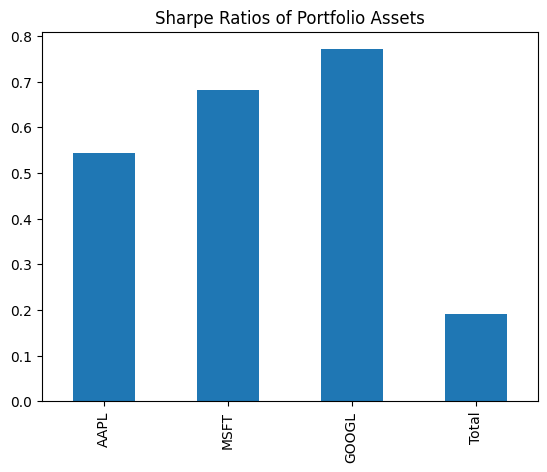

In [21]:
# Plot the Sharpe ratios of the portfolio assets
sharpes.plot.bar(title="Sharpe Ratios of Portfolio Assets")

#### Sortino Ratio

The formula of the Sortino Ratio is the following:

$$
Sortino\ Ratio = \frac{R_p - R_f}{\sigma_d}
$$

Where:

* $R_p$ is the expected portfolio return
* $R_f$ is the risk-free rate
* $\sigma_d$ is the standard deviation of negative asset returns

The Sortino ratio is a variation of the Sharpe ratio. It takes a portfolio's return and divides it by the “Downside Risk.” Downside risk is the volatility of returns below a certain level. This level is based on average returns. The ratio measures the downside risk of a fund or stock. Like the Sharpe ratio, higher values indicate less risk relative to return.

In [22]:
# Define the Sortino ratio calculation function
def sortino_ratio(series, N, rf):
    mean = series.mean() * N - rf
    std_neg = series[series < 0].std() * np.sqrt(N)
    return mean / std_neg

In [23]:
# Apply the Sortino ratio function to each column in the portf_val_growth dataframe
sortinos = portf_val_growth.apply(sortino_ratio, args=(N, rf), axis=0)

<Axes: title={'center': 'Sortino Ratios of Portfolio Assets'}>

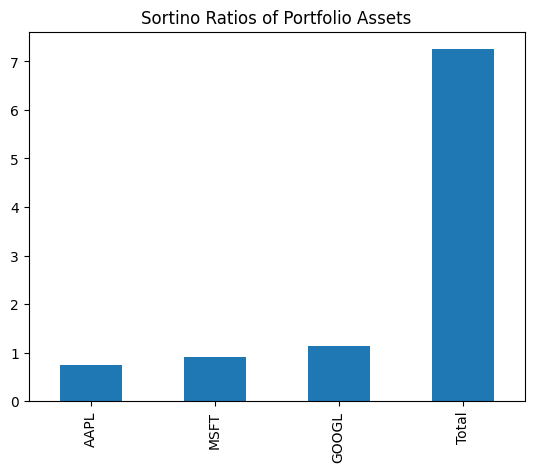

In [24]:
# Plot the Sortino ratios of the portfolio assets
sortinos.plot.bar(title="Sortino Ratios of Portfolio Assets")

Training data:
              AAPL                                    MSFT                  \
              Open    High     Low   Close OpenInt    Open    High     Low   
Date                                                                         
2005-01-03  4.1529  4.1685  4.0083  4.0519       0  22.475  22.601  22.347   
2005-01-04  4.0825  4.1915  4.0314  4.0940       0  22.425  22.727  22.355   
2005-01-05  4.0940  4.1775  4.0940  4.1300       0  22.489  22.727  22.441   
2005-01-06  4.1491  4.1556  4.0545  4.1324       0  22.496  22.692  22.340   
2005-01-07  4.1646  4.4578  4.1469  4.4336       0  22.506  22.550  22.324   

                              GOOGL                                    
             Close OpenInt     Open     High     Low    Close OpenInt  
Date                                                                   
2005-01-03  22.425       0   98.700  101.820  97.730  101.360       0  
2005-01-04  22.506       0  100.700  101.460  96.740   97.250       0  


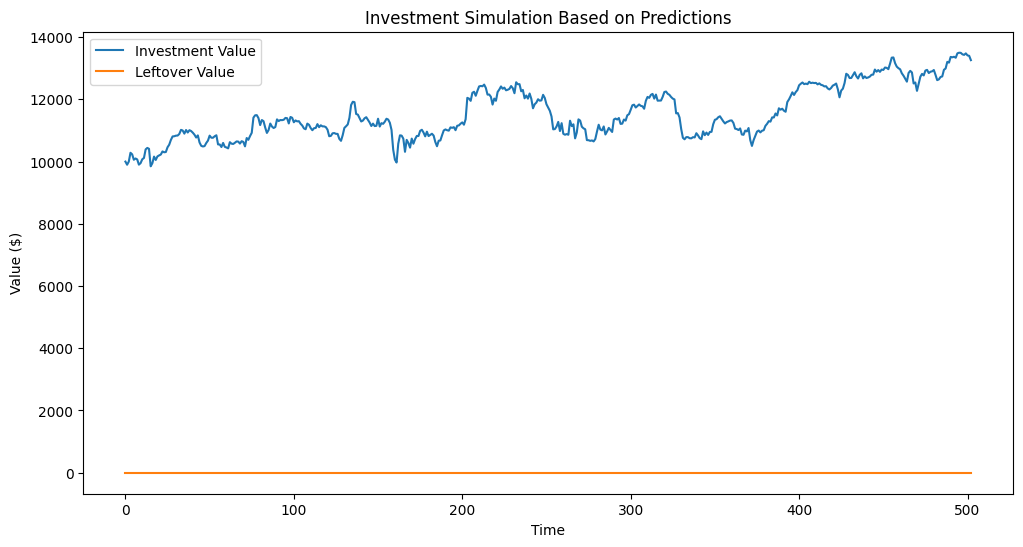

In [27]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Define the assets and their respective portfolio weights
assets = ['AAPL', 'MSFT', 'GOOGL']
portfolio = [0.45, 0.35, 0.20]

# Define the start and end dates for historical data
start_date_train = "2005-01-01"
end_date_train = "2014-12-31"
start_date_test = "2015-01-01"
end_date_test = "2016-12-31"
investment = 10000

# Function to read data from the files
def read_data(filename):
    return pd.read_csv(filename, usecols=['Date', 'Open', 'High', 'Low', 'Close', 'OpenInt'], parse_dates=['Date'], index_col='Date')

# Dictionary to map asset names to their respective data files
file_mapping = {
    'AAPL': './data/aapl.us.txt',
    'MSFT': './data/msft.us.txt',
    'GOOGL': './data/googl.us.txt'
}

# Check if files exist
for asset in file_mapping.values():
    try:
        with open(asset) as f:
            pass
    except FileNotFoundError:
        print(f"File not found: {asset}")
        raise

# List to store the dataframes
dfs_train = []
dfs_test = []

# Read and split data for each asset
for asset in assets:
    data = read_data(file_mapping[asset])
    data_train = data.loc[start_date_train:end_date_train]
    data_test = data.loc[start_date_test:end_date_test]
    if data_train.empty or data_test.empty:
        print(f"No data found for {asset} in the specified date range.")
        continue
    dfs_train.append(data_train)
    dfs_test.append(data_test)

# Concatenate all dataframes for training and testing
if not dfs_train or not dfs_test:
    raise ValueError("No data available for any assets in the specified date range.")

combined_df_train = pd.concat(dfs_train, axis=1, keys=assets)
combined_df_test = pd.concat(dfs_test, axis=1, keys=assets)

# Check the dataframes before further processing
print("Training data:")
print(combined_df_train.head())
print("Test data:")
print(combined_df_test.head())

# Calculate normalized returns and growth rate for each asset's DataFrame
for asset in assets:
    combined_df_train[(asset, 'Norm return')] = combined_df_train[(asset, 'Close')] / combined_df_train[(asset, 'Close')].iloc[0]
    combined_df_train[(asset, 'Growth rate')] = combined_df_train[(asset, 'Close')].pct_change()
    combined_df_train[(asset, 'Position')] = combined_df_train[(asset, 'Norm return')] * investment
    combined_df_test[(asset, 'Norm return')] = combined_df_test[(asset, 'Close')] / combined_df_test[(asset, 'Close')].iloc[0]
    combined_df_test[(asset, 'Growth rate')] = combined_df_test[(asset, 'Close')].pct_change()
    combined_df_test[(asset, 'Position')] = combined_df_test[(asset, 'Norm return')] * investment

# Drop rows with NaN values, but first check the amount of NaN values
print("NaN values in training data before dropna:")
print(combined_df_train.isna().sum())
print("NaN values in test data before dropna:")
print(combined_df_test.isna().sum())

combined_df_train.dropna(inplace=True)
combined_df_test.dropna(inplace=True)

# Check the dataframes after dropping NaN values
print("Training data after dropna:")
print(combined_df_train.head())
print("Test data after dropna:")
print(combined_df_test.head())

# Flatten the multi-index columns
combined_df_train.columns = ['_'.join(col).strip() for col in combined_df_train.columns.values]
combined_df_test.columns = ['_'.join(col).strip() for col in combined_df_test.columns.values]

# Define the features and target variable for the decision tree
features = [f'{asset}_Open' for asset in assets] + [f'{asset}_High' for asset in assets] + \
           [f'{asset}_Low' for asset in assets] + [f'{asset}_Close' for asset in assets] + \
           [f'{asset}_OpenInt' for asset in assets] + [f'{asset}_Norm return' for asset in assets]

# Define the Action variable based on specific conditions
for asset in assets:
    combined_df_train[f'{asset}_Action'] = (combined_df_train[f'{asset}_Close'].shift(-1) > combined_df_train[f'{asset}_Close']).astype(int)
    combined_df_test[f'{asset}_Action'] = (combined_df_test[f'{asset}_Close'].shift(-1) > combined_df_test[f'{asset}_Close']).astype(int)

# Remove rows where the Action column is NaN
for asset in assets:
    combined_df_train.dropna(subset=[f'{asset}_Action'], inplace=True)
    combined_df_test.dropna(subset=[f'{asset}_Action'], inplace=True)

# Check the target variable
for asset in assets:
    print(f"Training target variable distribution for {asset}:")
    print(combined_df_train[f'{asset}_Action'].value_counts())
    print(f"Test target variable distribution for {asset}:")
    print(combined_df_test[f'{asset}_Action'].value_counts())

# Initialize and fit the decision tree classifier for each asset
classifiers = {}
for asset in assets:
    X_train = combined_df_train[[f'{asset}_Open', f'{asset}_High', f'{asset}_Low', f'{asset}_Close', f'{asset}_OpenInt', f'{asset}_Norm return']]
    Y_train = combined_df_train[f'{asset}_Action']
    clf = DecisionTreeClassifier()
    clf.fit(X_train, Y_train)
    classifiers[asset] = clf

# Generate predictions for each asset using the trained classifiers
predictions = {}
for asset in assets:
    X_test = combined_df_test[[f'{asset}_Open', f'{asset}_High', f'{asset}_Low', f'{asset}_Close', f'{asset}_OpenInt', f'{asset}_Norm return']]
    predictions[asset] = classifiers[asset].predict(X_test)

# Define the Model_invest function to simulate investment decisions based on predictions
def Model_invest(predictions, investment):
    ivs = [investment]  # Initialize a list to store investment values over time
    left = [0]  # Initialize a list to store leftover values over time

    # Iterate through predictions starting from the second element
    for k in range(1, len(predictions[assets[0]])):
        # Calculate the combined growth rate for all assets
        combined_growth = sum(combined_df_test[f'{asset}_Growth rate'].iloc[k] * portfolio[i] for i, asset in enumerate(assets))
        current_investment = ivs[-1] + (ivs[-1] * combined_growth)  # Calculate the current investment value
        current_left = left[-1]  # Get the current leftover value

        # Sum of predictions across all assets
        prediction_sum = sum(predictions[asset][k] for asset in assets)

        if prediction_sum > 0:  # If the combined prediction is to invest
            if current_left == 0:
              pass
            new_investment = current_investment + current_left  # Add leftover to investment
            ivs.append(new_investment)  # Update the investment list
            left.append(0)  # Reset the leftover list

        elif prediction_sum < 0:  # If the combined prediction is to stop loss
            new_left = current_investment * 0.25 + left[-1]  # Add current investment to leftover
            new_investment = current_investment * 0.75  # Change the investment to represent the sell

            ivs.append(new_investment)  # Update the investment list
            left.append(new_left)  # Update the leftover list

        else:  # If the combined prediction is to Hold
            ivs.append(current_investment)  # Keep the investment unchanged
            left.append(current_left)  # Keep the leftover unchanged

    # Return a list of tuples with investment and leftover values
    return list(zip(ivs, left))

# Perform the investment simulation
investment_results = Model_invest(predictions, investment)

# Plot the investment results
investment_values, leftover_values = zip(*investment_results)
plt.figure(figsize=(12, 6))
plt.plot(investment_values, label='Investment Value')
plt.plot(leftover_values, label='Leftover Value')
plt.title('Investment Simulation Based on Predictions')
plt.xlabel('Time')
plt.ylabel('Value ($)')
plt.legend()
plt.show()


Model Accuracy on Test Set: 0.51
Model Accuracy on Test Set: 0.52
Model Accuracy on Test Set: 0.50


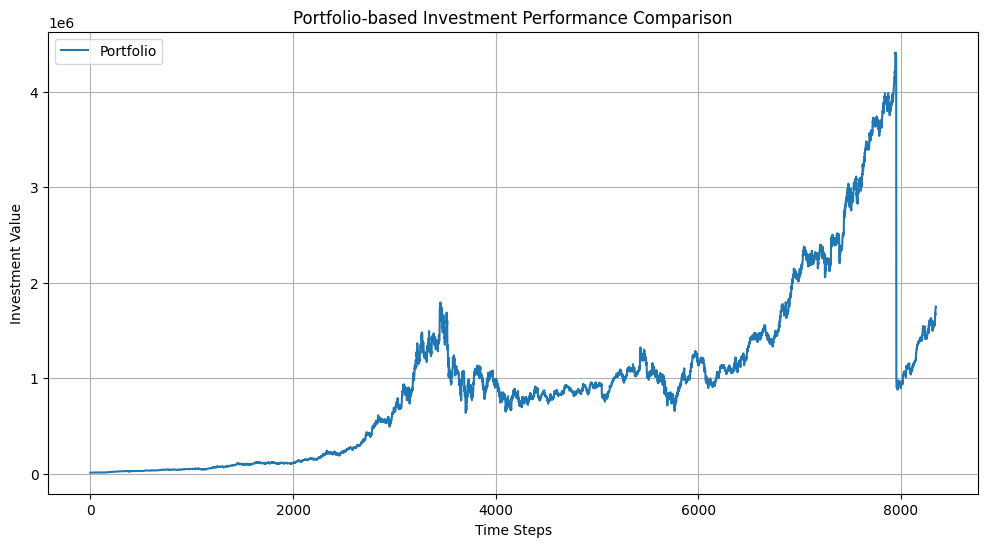

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 投資シミュレーション関数
def Model_invest(predictions, investment, growth_rates):
    ivs = [investment]
    left = [0]

    for k, p in enumerate(predictions[1:]):
        growth = growth_rates[k]
        current_investment = ivs[-1] + (ivs[-1] * growth)
        current_left = left[-1]

        if p == 1:
            if current_left == 0:
                pass
            new_investment = current_investment + current_left
            ivs.append(new_investment)
            left.append(0)
        elif p == -1:
            new_left = current_investment * 0.25 + left[-1]
            new_investment = current_investment * 0.75
            ivs.append(new_investment)
            left.append(new_left)
        else:
            ivs.append(current_investment)
            left.append(current_left)

    return list(zip(ivs, left))

# データの読み込みと前処理
def load_and_preprocess(file_path):
    df = pd.read_csv(file_path, sep=',')
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    
    # NaN値の処理
    df['Growth rate'] = df['Close'].pct_change()
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA20'] = df['Close'].rolling(window=20).mean()
    df['RSI'] = calculate_rsi(df['Close'])
    
    # 目標変数の作成（次の日の株価が上がれば1、下がれば0）
    df['Target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
    
    # NaN値がある行を削除
    df.dropna(inplace=True)
    
    return df

# RSI（Relative Strength Index）の計算
def calculate_rsi(prices, period=14):
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# 機械学習モデルの作成と予測
def ml_prediction_model(df):
    features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Growth rate', 'MA5', 'MA20', 'RSI']
    X = df[features]
    y = df['Target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model Accuracy on Test Set: {accuracy:.2f}")
    
    return model, X

# メイン処理
def main():
    file_paths = ['./data/aapl.us.txt', './data/msft.us.txt', './data/googl.us.txt']
    initial_investment = 10000  # 初期投資額
    
    # ポートフォリオの重み（配分比率）を設定
    portfolio_weights = {
        'AAPL': 0.4,
        'MSFT': 0.3,
        'GOOGL': 0.3
    }

    results = {}

    for file_path in file_paths:
        stock_name = file_path.split('/')[-1].split('.')[0].upper()
        df = load_and_preprocess(file_path)
        model, X = ml_prediction_model(df)
        
        predictions = model.predict(X)
        investment_results = Model_invest(predictions, initial_investment * portfolio_weights[stock_name], df['Growth rate'].values)
        
        # ポートフォリオ全体の投資価値を記録
        if 'Portfolio' not in results:
            results['Portfolio'] = [iv for iv, _ in investment_results]
        else:
            for i, (iv, _) in enumerate(investment_results):
                results['Portfolio'][i] += iv

    # 結果のプロット
    plt.figure(figsize=(12, 6))
    for stock, values in results.items():
        plt.plot(values, label=stock)
    
    plt.title('Portfolio-based Investment Performance Comparison')
    plt.xlabel('Time Steps')
    plt.ylabel('Investment Value')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
